# 1. Считать в pandas.DataFrame любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [61]:
import pandas as pd

# read csv files
titanic_df = pd.read_csv('titanic.csv')

Описание датасета

Источник: https://www.kaggle.com/datasets/brendan45774/test-file/data



In [62]:
description_list = [
    "PassengerId",
    "Survived (0 = Dead 1 = Alive)",
    "Pclass (1 = First class 2 = Second class 3 = Third class)",
    "Name (Name of passenger)",
    "Sex (Gender)",
    "Age (Age of passenger)",
    "SibSp (Number of Siblings/Spouses Aboard)",
    "Parch (Number of Parents/Children Aboard)",
    "Ticket",
    "Fare (Passenger fare)",
    "Cabin (Cabin number)",
    "Embarked (Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton)"
]
dtypes_column = dataset.dtypes
df_info = pd.DataFrame({'Тип': dtypes_column, 'Описание': description_list})
pd.set_option('display.max_colwidth', None)
df_info

ValueError: array length 12 does not match index length 10

In [25]:
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# 2. Бинарная классификация:

- Осуществить предобработку данных (избавиться от null, убрать некоторые признаки и т.п.) - "подчистить данные".

In [63]:
# Удалим ненужные признаки
titanic_cleaned = titanic_df.drop(columns=['Name', 'Ticket', 'Cabin'])

# Заполним пропуски в числовых столбцах медианой
titanic_cleaned['Age'].fillna(titanic_cleaned['Age'].median(), inplace=True)
titanic_cleaned['Fare'].fillna(titanic_cleaned['Fare'].median(), inplace=True)

# Заполним пропуски в категориальных столбцах самым частым значением
titanic_cleaned['Embarked'].fillna(titanic_cleaned['Embarked'].mode()[0], inplace=True)

# Кодируем категориальные признаки
le = LabelEncoder()
titanic_cleaned['Sex'] = le.fit_transform(titanic_cleaned['Sex'])
titanic_cleaned['Embarked'] = le.fit_transform(titanic_cleaned['Embarked'])

titanic_cleaned.info()

dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


C:\Users\ikasp\AppData\Local\Temp\ipykernel_11140\42410212.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_cleaned['Age'].fillna(titanic_cleaned['Age'].median(), inplace=True)
C:\Users\ikasp\AppData\Local\Temp\ipykernel_11140\42410212.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,1,1,female,23.0,1,0,21228,82.2667,B45,S
14,1,1,female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,1,1,female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,1,1,female,22.0,0,1,113509,61.9792,B36,C
28,0,1,male,41.0,0,0,113054,30.5000,A21,S
34,0,1,male,30.0,1,0,13236,57.7500,C78,C
44,1,1,female,45.0,1,0,11753,52.5542,D19,S
46,0,1,male,45.0,0,0,PC 17594,29.7000,A9,C
48,1,1,female,60.0,0,0,11813,76.2917,D15,C
50,0,1,male,24.0,1,0,13695,60.0000,C31,S


- Разобъем выборку на обучающую и тестовую.

In [79]:
from sklearn.model_selection import train_test_split

# Определим значение гиперпараметра k
k = 5

# Разделим данные на признаки и целевую переменную
X = titanic_cleaned.drop(columns=['Survived'])
y = titanic_cleaned['Survived']

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((292, 8), (126, 8))

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Обучим модель kNN
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Предскажем на тестовой выборке
y_pred = knn.predict(X_test)

# Посчитаем метрики
print('Metrics without normalization:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Metrics without normalization:
Accuracy: 0.6349206349206349
Precision: 0.42857142857142855
Recall: 0.36585365853658536
F1 Score: 0.39473684210526316
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.74        85
           1       0.43      0.37      0.39        41

    accuracy                           0.63       126
   macro avg       0.57      0.57      0.57       126
weighted avg       0.62      0.63      0.63       126



- Проведем нормализацию данных

In [83]:
from sklearn.preprocessing import StandardScaler

# Нормализуем данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучим модель kNN на нормализованных данных
knn_scaled = KNeighborsClassifier(n_neighbors=k)
knn_scaled.fit(X_train_scaled, y_train)

# Предскажем на тестовой выборке
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Посчитаем метрики
print('Metrics with normalization:')
print('Accuracy:', accuracy_score(y_test, y_pred_scaled))
print('Precision:', precision_score(y_test, y_pred_scaled))
print('Recall:', recall_score(y_test, y_pred_scaled))
print('F1 Score:', f1_score(y_test, y_pred_scaled))
print('Classification Report:\n', classification_report(y_test, y_pred_scaled))

Metrics with normalization:
Accuracy: 0.9920634920634921
Precision: 1.0
Recall: 0.975609756097561
F1 Score: 0.9876543209876543
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        85
           1       1.00      0.98      0.99        41

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



Классификация с использованием kNN с нормализацией показала лучшие результаты по сравнению с классификацией без нормализации. Модель с нормализацией имеет более высокие значения accuracy, precision, recall и F1 Score.

In [84]:
comparison = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Without Normalization': [accuracy, precision, recall, f1],
    'With Normalization': [accuracy_scaled, precision_scaled, recall_scaled, f1_scaled]
}
comparison_df = pd.DataFrame(comparison)
comparison_df

,Metric,Without Normalization,With Normalization
0,Accuracy,0.634921,0.992063
1,Precision,0.428571,1.000000
2,Recall,0.365854,0.975610
3,F1 Score,0.394737,0.987654


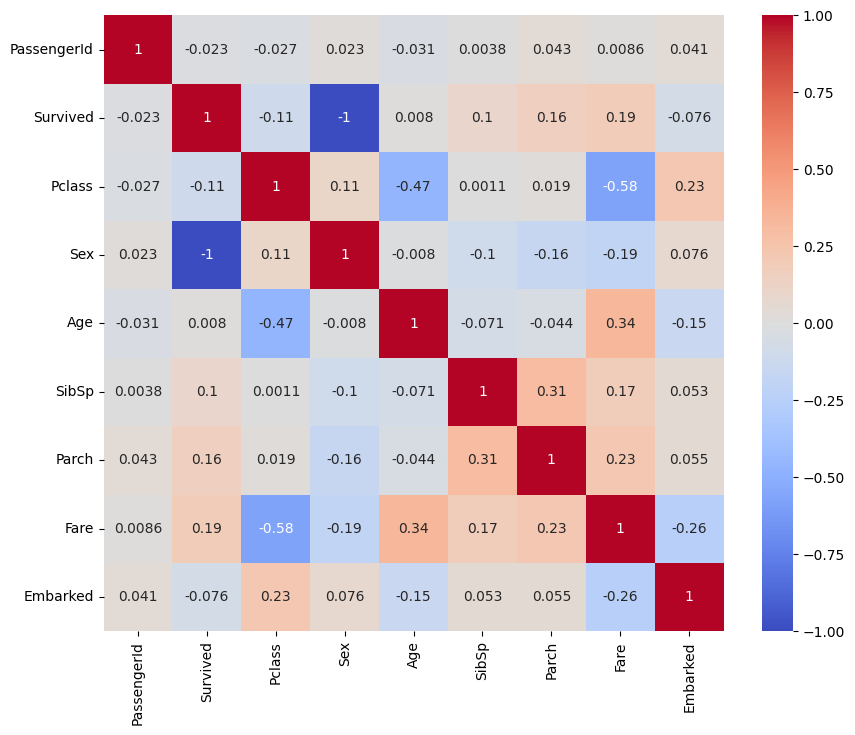

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построим корреляционную матрицу
corr_matrix = titanic_cleaned.corr()

# Построим heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [86]:
import numpy as np

# отфильтруем признаки по важности
np.fill_diagonal(corr_matrix.values, 0)
T_corr = 0.2
corr_filtered = corr_matrix[abs(corr_matrix) > T_corr]
f = corr_filtered.abs().mean().sort_values(ascending=False)
T_filter = 0.3

important_features = f[f>T_filter]

important_features, len(important_features)

(Survived    1.000000
 Sex         1.000000
 Pclass      0.424383
 Age         0.405105
 Fare        0.351905
 SibSp       0.306895
 dtype: float64,
 6)

In [95]:
selected_features = ['Age', 'Pclass', 'SibSp']

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

knn.fit(X_train_selected, y_train)
y_pred_selected = knn.predict(X_test_selected)

# Посчитаем метрики
print('Metrics after feature selection:')
print('Accuracy:', accuracy_score(y_test, y_pred_selected))
print('Precision:', precision_score(y_test, y_pred_selected))
print('Recall:', recall_score(y_test, y_pred_selected))
print('F1 Score:', f1_score(y_test, y_pred_selected))
print('Classification Report:\n', classification_report(y_test, y_pred_selected))

Metrics after feature selection:
Accuracy: 0.5873015873015873
Precision: 0.34285714285714286
Recall: 0.2926829268292683
F1 Score: 0.3157894736842105
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.73      0.70        85
           1       0.34      0.29      0.32        41

    accuracy                           0.59       126
   macro avg       0.51      0.51      0.51       126
weighted avg       0.57      0.59      0.58       126



In [96]:
print('Comparison of results:')
print('Before feature selection:')
print('Accuracy:', accuracy_score(y_test, y_pred_scaled))
print('After feature selection:')
print('Accuracy:', accuracy_score(y_test, y_pred_selected))

Comparison of results:
Before feature selection:
Accuracy: 0.9920634920634921
After feature selection:
Accuracy: 0.5873015873015873


Общая точность и другие метрики значительно снизились после выделения признаков.

Теперь переберем значения гиперпараметра k и построим график.

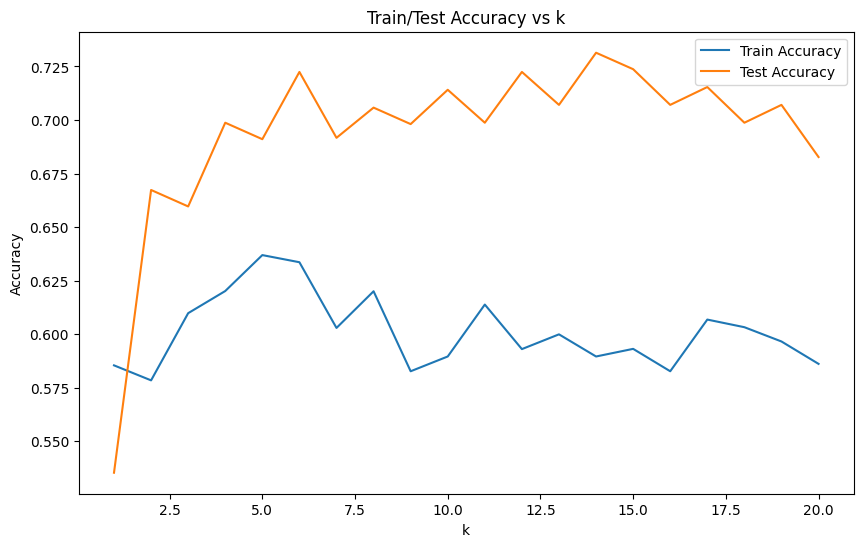

In [97]:
from sklearn.model_selection import cross_val_score

k_range = range(1, 21)
train_scores = []
test_scores = []

for k in k_range:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_cv, X_train_filtered_scaled, y_train, cv=10, scoring='accuracy')
    train_scores.append(scores.mean())
    scores = cross_val_score(knn_cv, X_test_filtered_scaled, y_test, cv=10, scoring='accuracy')
    test_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(k_range, train_scores, label='Train Accuracy')
plt.plot(k_range, test_scores, label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train/Test Accuracy vs k')
plt.show()


# 3. Многоклассовая классификация:

In [99]:
import pandas as pd
from sklearn.datasets import load_wine

wine_data = load_wine()

df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target

print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

Для многоклассовой классификации используется wine dataset (Датасет с тремя классами вин на основе их химических характеристик).

В датасете Wine содержатся следующие атрибуты (13 химических характеристик):

1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

Целевой атрибут (target) содержит три класса вин:
- Класс 0
- Класс 1
- Класс 2

In [100]:
# Проверка на наличие пропущенных значений
print(df.isnull().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


- Нормализация данных

In [101]:
from sklearn.preprocessing import StandardScaler

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['target']))

- Разделение на выборки

In [102]:
from sklearn.model_selection import train_test_split

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['target'], test_size=0.2, random_state=42)

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

k = 5
# Обучение модели kNN
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Предсказания
y_pred = knn.predict(X_test)

# Оценка модели
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9444444444444444
Precision: 0.9407407407407407
Recall: 0.9523809523809524
F1 Score: 0.9432568783481562
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



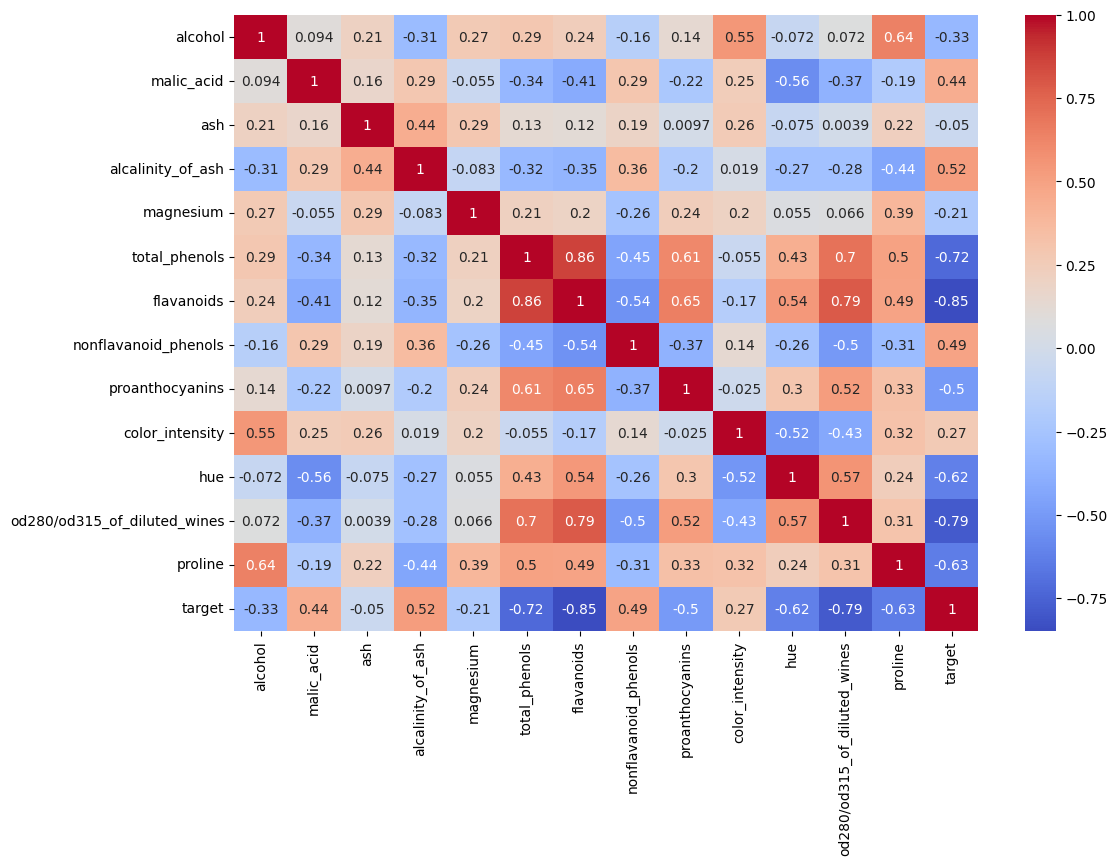

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Корреляционная матрица
corr_matrix = df.corr()

# Построение heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [129]:
# Выбор важных признаков на основе корреляционной матрицы
important_features = corr_matrix['target'].abs().sort_values(ascending=False).index[1:6]  # 5 наиболее важных признаков
important_features

Index(['od280/od315_of_diluted_wines', 'total_phenols', 'proline', 'hue',
       'alcalinity_of_ash'],
      dtype='object')

In [132]:
# Данные с отфильтрованными признаками
X_filtered = df[important_features]

# Нормализация отфильтрованных данных
X_filtered_scaled = scaler.fit_transform(X_filtered)

# Разделение данных
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_filtered_scaled, df['target'], test_size=0.2, random_state=42)

# Обучение модели kNN
knn.fit(X_train_f, y_train_f)

# Предсказания
y_pred_f = knn.predict(X_test_f)

print('Accuracy (filtered):', accuracy_score(y_test_f, y_pred_f))
print('Precision (filtered):', precision_score(y_test_f, y_pred_f, average='macro'))
print('Recall (filtered):', recall_score(y_test_f, y_pred_f, average='macro'))
print('F1-score (filtered):', f1_score(y_test_f, y_pred_f, average='macro'))
print('Classification Report:\n', classification_report(y_test_f, y_pred_f))


Accuracy (filtered): 0.9166666666666666
Precision (filtered): 0.9104700854700855
Recall (filtered): 0.9107142857142857
F1-score (filtered): 0.9098020434227331
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.92      0.86      0.89        14
           2       0.88      0.88      0.88         8

    accuracy                           0.92        36
   macro avg       0.91      0.91      0.91        36
weighted avg       0.92      0.92      0.92        36



In [133]:
print("Метрики до фильтрации:")
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))

print("\nМетрики после фильтрации:")
print('Accuracy (filtered):', accuracy_score(y_test_f, y_pred_f))
print('Precision (filtered):', precision_score(y_test_f, y_pred_f, average='macro'))
print('Recall (filtered):', recall_score(y_test_f, y_pred_f, average='macro'))
print('F1-score (filtered):', f1_score(y_test_f, y_pred_f, average='macro'))


Метрики до фильтрации:
Accuracy: 0.9444444444444444
Precision: 0.9407407407407407
Recall: 0.9523809523809524
F1 Score: 0.9432568783481562

Метрики после фильтрации:
Accuracy (filtered): 0.9166666666666666
Precision (filtered): 0.9104700854700855
Recall (filtered): 0.9107142857142857
F1-score (filtered): 0.9098020434227331


Выделение признаков немного ухудшило результаты всех метрик.

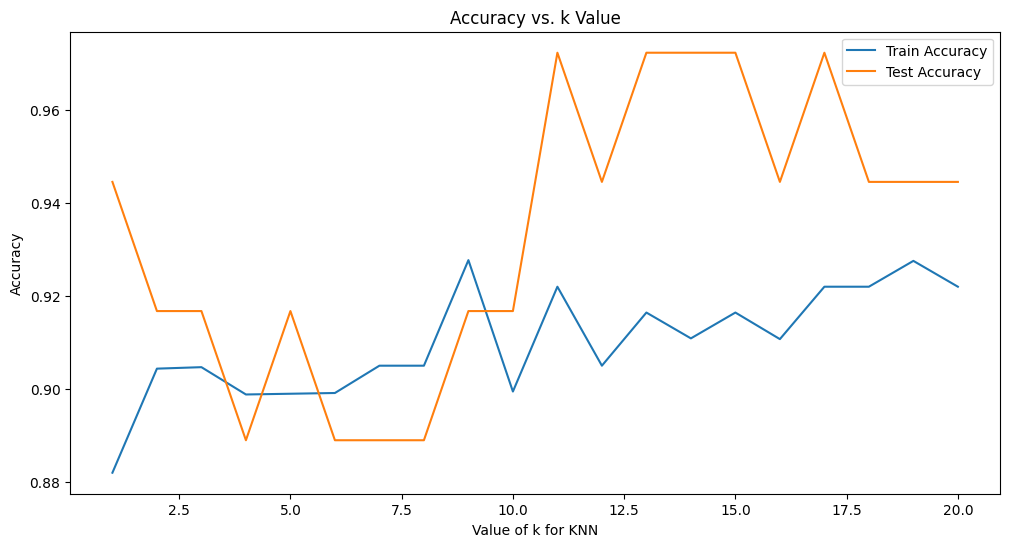

In [134]:
from sklearn.model_selection import cross_val_score

# Диапазон значений k
k_range = range(1, 21)
train_accuracy = []
test_accuracy = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_filtered_scaled, df['target'], cv=5)
    train_accuracy.append(scores.mean())
    knn.fit(X_train_f, y_train_f)
    test_accuracy.append(knn.score(X_test_f, y_test_f))

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(k_range, train_accuracy, label='Train Accuracy')
plt.plot(k_range, test_accuracy, label='Test Accuracy')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. k Value')
plt.show()


- Поиск лучшего классификатора

In [136]:
best_k = k_range[np.argmax(train_accuracy)]
print(f'\nBest k for kNN: {best_k}')

# Обучим лучшую модель и выведем метрики, classification report и confusion matrix
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_f, y_train_f)
best_y_pred = best_knn.predict(X_test_f)

print('\nMetrics for Best kNN Model:')
print('Accuracy:', accuracy_score(y_test_f, best_y_pred))
print('Precision:', precision_score(y_test_f, best_y_pred, average='weighted'))
print('Recall:', recall_score(y_test_f, best_y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test_f, best_y_pred, average='weighted'))
print(classification_report(y_test_f, best_y_pred))


Best k for kNN: 9

Metrics for Best kNN Model:
Accuracy: 0.9166666666666666
Precision: 0.9163817663817664
Recall: 0.9166666666666666
F1 Score: 0.9156023839931886
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.92      0.86      0.89        14
           2       0.88      0.88      0.88         8

    accuracy                           0.92        36
   macro avg       0.91      0.91      0.91        36
weighted avg       0.92      0.92      0.92        36



- Построение confusion matrix 

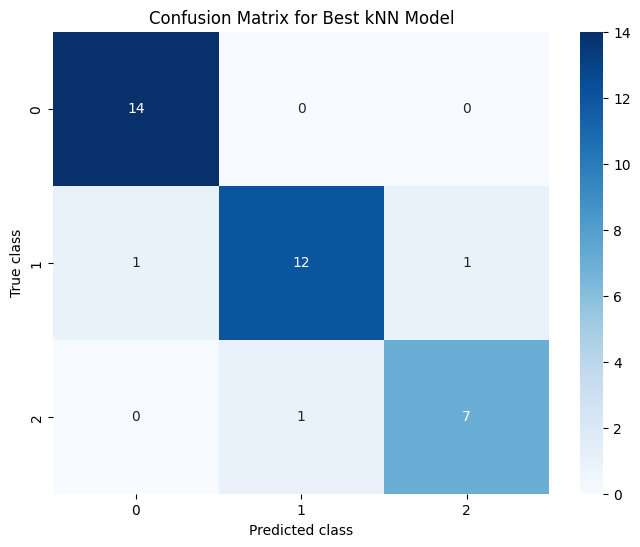

In [138]:
from sklearn.metrics import confusion_matrix

conf_matrix_best = confusion_matrix(y_test_f, best_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix for Best kNN Model')
plt.show()
     